In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Kalimati_Tarkari_Dataset.csv")
df.head()

/tmp/ipython-input-2146517307.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Kalimati_Tarkari_Dataset.csv")


,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [3]:
df.shape

(280862, 6)

In [4]:
df.isnull().sum()

,0
Commodity,0
Date,0
Unit,0
Minimum,0
Maximum,0
Average,0


In [5]:
df = df.drop(['Unit','Minimum','Maximum'],axis=1)

In [6]:
df.head()

,Commodity,Date,Average
0,Tomato Big(Nepali),6/16/2013,37.5
1,Tomato Small(Local),6/16/2013,29.0
2,Potato Red,6/16/2013,20.5
3,Potato White,6/16/2013,15.5
4,Onion Dry (Indian),6/16/2013,29.0


In [7]:
df['Date']

,Date
0,6/16/2013
1,6/16/2013
2,6/16/2013
3,6/16/2013
4,6/16/2013
...,...
280857,2023-09-28
280858,2023-09-28
280859,2023-09-28
280860,2023-09-28


In [8]:
df['Date'] = pd.to_datetime(
    df['Date'],
    format='mixed'
)


In [9]:
df.isnull().sum()

,0
Commodity,0
Date,0
Average,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280862 entries, 0 to 280861
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Commodity  280862 non-null  object        
 1   Date       280862 non-null  datetime64[ns]
 2   Average    280862 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 6.4+ MB


In [11]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

df.head()

,Commodity,Date,Average,year,month
0,Tomato Big(Nepali),2013-06-16,37.5,2013,6
1,Tomato Small(Local),2013-06-16,29.0,2013,6
2,Potato Red,2013-06-16,20.5,2013,6
3,Potato White,2013-06-16,15.5,2013,6
4,Onion Dry (Indian),2013-06-16,29.0,2013,6


In [12]:
df['month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int32)

In [13]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int32)

In [14]:
new_df = df.drop('Date',axis=1)

In [15]:
new_df

,Commodity,Average,year,month
0,Tomato Big(Nepali),37.5,2013,6
1,Tomato Small(Local),29.0,2013,6
2,Potato Red,20.5,2013,6
3,Potato White,15.5,2013,6
4,Onion Dry (Indian),29.0,2013,6
...,...,...,...,...
280857,Tomato Small(Indian),Rs 50.00,2023,9
280858,Tomato Small(Local),Rs 55.00,2023,9
280859,Tomato Small(Tunnel),Rs 69.00,2023,9
280860,Turnip A,Rs 75.00,2023,9


In [16]:
new_df['Commodity']

,Commodity
0,Tomato Big(Nepali)
1,Tomato Small(Local)
2,Potato Red
3,Potato White
4,Onion Dry (Indian)
...,...
280857,Tomato Small(Indian)
280858,Tomato Small(Local)
280859,Tomato Small(Tunnel)
280860,Turnip A


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280862 entries, 0 to 280861
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Commodity  280862 non-null  object
 1   Average    280862 non-null  object
 2   year       280862 non-null  int32 
 3   month      280862 non-null  int32 
dtypes: int32(2), object(2)
memory usage: 6.4+ MB


In [20]:
price_cols = [ 'Average']

for col in price_cols:
    new_df[col] = pd.to_numeric(
        new_df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)

    )

In [22]:
new_df['Average'].dtype

dtype('float64')

In [23]:
new_df['Average'] = new_df['Average'].round().astype(int)

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280862 entries, 0 to 280861
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Commodity  280862 non-null  object
 1   Average    280862 non-null  int64 
 2   year       280862 non-null  int32 
 3   month      280862 non-null  int32 
dtypes: int32(2), int64(1), object(1)
memory usage: 6.4+ MB


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280862 entries, 0 to 280861
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Commodity  280862 non-null  object
 1   Average    280862 non-null  int64 
 2   year       280862 non-null  int32 
 3   month      280862 non-null  int32 
dtypes: int32(2), int64(1), object(1)
memory usage: 6.4+ MB


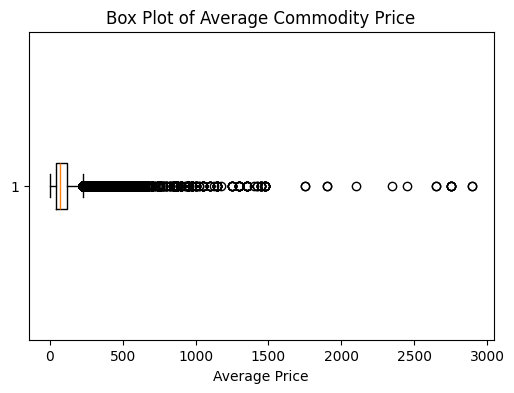

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(new_df['Average'], vert=False)
plt.title('Box Plot of Average Commodity Price')
plt.xlabel('Average Price')
plt.show()

In [43]:
Q1 = new_df['Average'].quantile(0.25)
Q3 = new_df['Average'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = new_df[
    (new_df['Average'] < lower_bound) |
    (new_df['Average'] > upper_bound)
]

print("Number of outliers:", outliers.shape[0])


Number of outliers: 28515


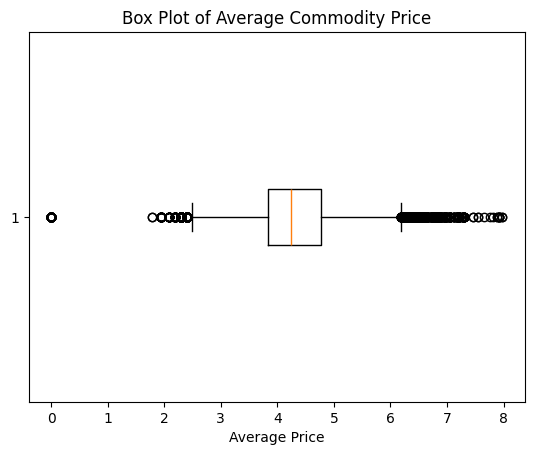

In [45]:
new_df['Average_log'] = np.log1p(new_df['Average'])
plt.boxplot(new_df['Average_log'], vert=False)
plt.title('Box Plot of Average Commodity Price')
plt.xlabel('Average Price')
plt.show()

In [46]:
Q1 = new_df['Average_log'].quantile(0.25)
Q3 = new_df['Average_log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = new_df[
    (new_df['Average_log'] < lower_bound) |
    (new_df['Average_log'] > upper_bound)
]

print("Number of outliers:", outliers.shape[0])

Number of outliers: 2637


In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280862 entries, 0 to 280861
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Commodity    280862 non-null  object 
 1   Average      280862 non-null  int64  
 2   year         280862 non-null  int32  
 3   month        280862 non-null  int32  
 4   Average_log  280862 non-null  float64
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 8.6+ MB


In [26]:
new_df['Commodity'].unique()

array(['Tomato Big(Nepali)', 'Tomato Small(Local)', 'Potato Red',
       'Potato White', 'Onion Dry (Indian)', 'Carrot(Local)',
       'Cabbage(Local)', 'Cauli Local', 'Raddish Red',
       'Raddish White(Local)', 'Brinjal Long', 'Brinjal Round',
       'Cow pea(Long)', 'Green Peas', 'French Bean(Local)',
       'Soyabean Green', 'Bitter Gourd', 'Bottle Gourd',
       'Pointed Gourd(Local)', 'Snake Gourd', 'Smooth Gourd',
       'Sponge Gourd', 'Pumpkin', 'Squash(Long)', 'Turnip', 'Okara',
       'Christophine', 'Brd Leaf Mustard', 'Spinach Leaf', 'Cress Leaf',
       'Mustard Leaf', 'Fenugreek Leaf', 'Onion Green', 'Mushroom(Kanya)',
       'Asparagus', 'Neuro', 'Brocauli', 'Sugarbeet', 'Drumstick',
       'Red Cabbbage', 'Lettuce', 'Celery', 'Parseley', 'Fennel Leaf',
       'Mint', 'Turnip A', 'Tamarind', 'Bamboo Shoot', 'Tofu', 'Gundruk',
       'Apple(Jholey)', 'Banana', 'Lime', 'Pomegranate', 'Mango(Maldah)',
       'Grapes(Green)', 'Water Melon(Green)', 'Sweet Orange', 'Pineappl

In [29]:
import category_encoders as ce

In [48]:
new_df = new_df.drop('Average',axis=1)

In [49]:
new_df.head()

,Commodity,year,month,Average_log
0,Tomato Big(Nepali),2013,6,3.663562
1,Tomato Small(Local),2013,6,3.401197
2,Potato Red,2013,6,3.044522
3,Potato White,2013,6,2.833213
4,Onion Dry (Indian),2013,6,3.401197


In [ ]:
#pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.8 MB/s eta 0:00:00


In [50]:
X = new_df.drop(columns=['Average_log'])
y = new_df['Average_log']

In [52]:
X.head()

,Commodity,year,month
0,Tomato Big(Nepali),2013,6
1,Tomato Small(Local),2013,6
2,Potato Red,2013,6
3,Potato White,2013,6
4,Onion Dry (Indian),2013,6


In [53]:
y.head()

,Average_log
0,3.663562
1,3.401197
2,3.044522
3,2.833213
4,3.401197


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
encoder = ce.TargetEncoder(cols=['Commodity'])

In [57]:
X_train['Commodity_enc'] = encoder.fit_transform(X_train['Commodity'], y_train)
X_test['Commodity_enc'] = encoder.transform(X_test['Commodity'], y_test)

In [58]:
X_train.head()

,Commodity,year,month,Commodity_enc
174237,Christophine,2020,9,3.370356
236523,Garlic Green,2022,6,4.565492
209696,Onion Dry (Indian),2021,10,3.756044
812,Soyabean Green,2013,7,4.301851
24733,Asparagus,2014,8,5.515280


In [59]:
X_train = X_train.drop(columns=['Commodity'])
X_test = X_test.drop(columns=['Commodity'])

In [60]:
X_train.head()

,year,month,Commodity_enc
174237,2020,9,3.370356
236523,2022,6,4.565492
209696,2021,10,3.756044
812,2013,7,4.301851
24733,2014,8,5.515280


In [61]:
X_test.head()

,year,month,Commodity_enc
266288,2023,4,4.795595
65927,2016,4,5.610601
248247,2022,11,4.571339
172619,2020,8,5.449134
260373,2023,3,4.846071


In [62]:
y.head()

,Average_log
0,3.663562
1,3.401197
2,3.044522
3,2.833213
4,3.401197


In [63]:
import xgboost as xgb

In [64]:
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist',  # fast for large dataset
    n_jobs=-1
)

In [65]:
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=50
)

[0]	validation_0-rmse:0.70549
[50]	validation_0-rmse:0.31988
[100]	validation_0-rmse:0.30029
[150]	validation_0-rmse:0.28976
[200]	validation_0-rmse:0.28153
[250]	validation_0-rmse:0.27513
[300]	validation_0-rmse:0.27101
[350]	validation_0-rmse:0.26796
[400]	validation_0-rmse:0.26558
[450]	validation_0-rmse:0.26367
[499]	validation_0-rmse:0.26207


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [66]:
y_pred_log = model.predict(X_test)

In [68]:
y_pred_log

array([4.92066  , 5.7060504, 4.6011586, ..., 5.3350368, 3.9538076,
       3.682908 ], dtype=float32)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_log)
rmse = mean_squared_error(y_test, y_pred_log)
r2 = r2_score(y_test, y_pred_log)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

MAE  : 0.19
RMSE : 0.07
R²   : 0.8817


In [70]:
y_pred_price = np.expm1(y_pred_log)

In [71]:
y_pred_price.dtype

dtype('float32')

In [72]:
y_pred_price = np.round(y_pred_price).astype(int)

In [73]:
y_pred_price.dtype

dtype('int64')

In [74]:
import pandas as pd

data = pd.DataFrame({
    "year": [2025],
    "month": [5],
    "Commodity_enc": [3.370356]
})

# Predict
output_log = model.predict(data)
output =  np.expm1(output_log)
output= np.round(output).astype(int)
print("Predictions:",output )


Predictions: [51]


In [75]:
import joblib

In [76]:
joblib.dump(model, 'xgboost_price_model_updated.pkl')

['xgboost_price_model_updated.pkl']

In [77]:
joblib.dump(encoder, 'commodity_target_encoder_updated.pkl')

['commodity_target_encoder_updated.pkl']